In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_10x_mtx(
    "/Users/manuel/OneDrive/jupyter_notebooks/scanpy_scRNA-seq_analysis/hg19/",  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [ ]:
adata = adata[adata.obs.n_genes < 2500, :]
adata = adata[adata.obs.percent_mito < 0.05, :]

In [3]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [4]:
sc.pp.log1p(adata)

In [5]:
adata.raw = adata

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [7]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

In [8]:
sc.pp.scale(adata, max_value=10)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [9]:
sc.tl.pca(adata, svd_solver='arpack')

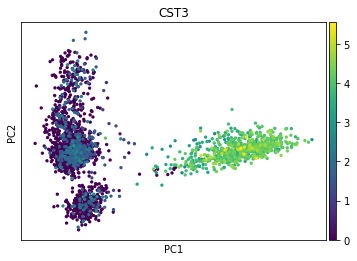

In [10]:
sc.pl.pca(adata, color='CST3')

In [12]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [13]:
sc.tl.umap(adata)

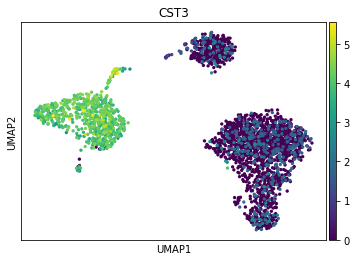

In [15]:
sc.pl.umap(adata, color='CST3')

In [17]:
sc.tl.leiden(adata)

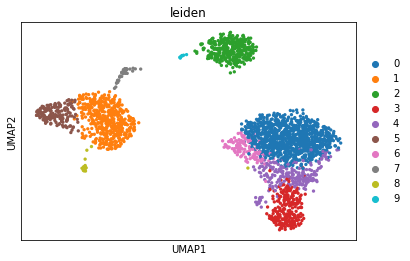

In [18]:
sc.pl.umap(adata, color='leiden')